In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load the dataset from the provided JSON URL
url = "https://flipsidecrypto.xyz/api/v1/queries/50f51f57-95e8-4267-a404-3b2f0acfe93a/data/latest"

# Fetch JSON data using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    df_original = pd.DataFrame(data)
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(df_original.columns)

Index(['DATE', 'TVLUSD', 'PRICE', 'PRICESTDDEV', 'TRADESCOUNT',
       'TRADINGVOLUSD', 'TRADINGVOLUSDLEAD'],
      dtype='object')


In [3]:
# Step 3: Data preprocessing

df1 = df_original.copy()

# Convert 'DATE' to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Extract features from 'DATE'
df1['day_of_week'] = df1['DATE'].dt.dayofweek
df1['month'] = df1['DATE'].dt.month
df1['day_of_month'] = df1['DATE'].dt.day

# Drop unnecessary columns
# df = df.drop(columns=['DAYOFMONTH', 'DAYNAME'])

df1.head()

,DATE,TVLUSD,PRICE,PRICESTDDEV,TRADESCOUNT,TRADINGVOLUSD,TRADINGVOLUSDLEAD,day_of_week,month,day_of_month
0,2024-06-23,4291354773,0.807425,0.009264,23673,1.087860e+08,NaN,6,6,23
1,2024-06-22,4319316645,0.802720,0.003486,20366,2.253940e+08,1.087860e+08,5,6,22
2,2024-06-21,4360296143,0.800214,0.004317,43354,2.265712e+08,2.253940e+08,4,6,21
3,2024-06-20,4499906659,0.816069,0.010954,32818,2.237176e+08,2.265712e+08,3,6,20
4,2024-06-19,4457253103,0.815892,0.011329,44659,4.223523e+08,2.237176e+08,2,6,19


In [4]:
# Step 4: Define features (inputs) and target variable (output)
# Drop rows where TRADINGVOLUSDLEAD is NaN
df = df1.dropna(subset=['TRADINGVOLUSDLEAD'])

X = df.drop(columns=['TRADINGVOLUSDLEAD', 'DATE']) # Features
y = df['TRADINGVOLUSDLEAD']  # Target variable



In [5]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 6: Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [7]:
# Step 7: Model evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.786079207886535e+16
Mean Absolute Error: 133144389.12435137


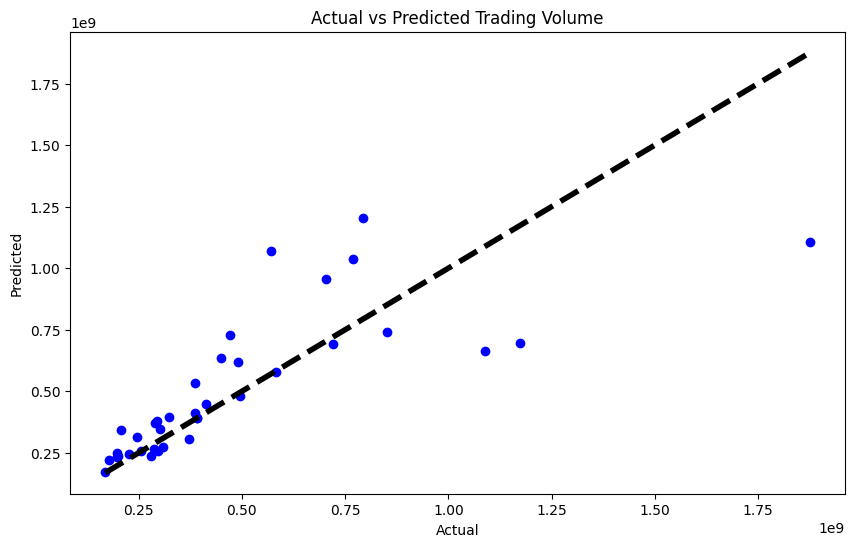

In [8]:
# Step 8: Visualization
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Trading Volume')
plt.show()


In [9]:
# Step 9: Prepare today's data for prediction
# Get the latest date from the original DataFrame
today_date = df1['DATE'].max()

# Filter today's data
today_data = df1[df1['DATE'] == today_date]

# Drop 'TRADINGVOLUMEUSD' and 'DATE' columns
today_data = today_data.drop(columns=['TRADINGVOLUSDLEAD', 'DATE'])

print(today_data)

       TVLUSD     PRICE  PRICESTDDEV  TRADESCOUNT  TRADINGVOLUSD  day_of_week  \
0  4291354773  0.807425     0.009264        23673   1.087860e+08            6   

   month  day_of_month  
0      6            23  


In [10]:
# Step 10: Predict next day and next week trading volume

# Make prediction for next day's trading volume
next_day_prediction = model.predict(today_data)

# Print prediction
print("Next Day Trading Volume Prediction:", next_day_prediction)

# Print prediction with formatted number
print("Next Day Trading Volume Prediction: ${:,.2f}".format(next_day_prediction[0]))


Next Day Trading Volume Prediction: [1.88566717e+08]
Next Day Trading Volume Prediction: $188,566,716.92
